# 2.3 지도 학습 알고리즘
- 분류와 회귀
- 일반화, 과대적합, 과소적합
- 모델 복잡도와 데이터셋 크기의 관계

## 2.3.1 예제에 사용할 알고리즘

In [1]:
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

In [2]:
path = 'c:/Windows/Fonts/malgun.ttf'
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


Text(0.5,0,'첫 번째 특성')

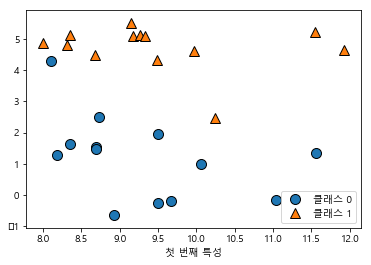

In [3]:
# 데이터셋을 만딉니다.
X, y = mglearn.datasets.make_forge()
# 산점도를 그립니다.
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(["클래스 0", "클래스 1"], loc=4)
plt.xlabel("첫 번째 특성")

X.shape: (26, 2)


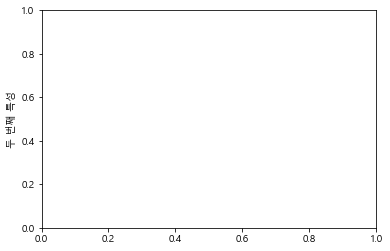

In [4]:
plt.ylabel("두 번째 특성")
print("X.shape: {}".format(X.shape))

Text(0,0.5,'타깃')

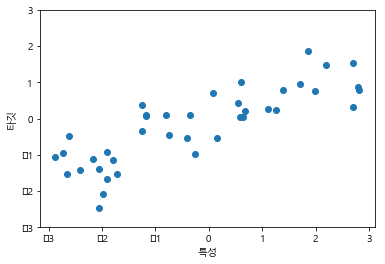

In [5]:
X,y = mglearn.datasets.make_wave(n_samples=40)
plt.plot(X, y, 'o')
plt.ylim(-3, 3)
plt.xlabel("특성")
plt.ylabel("타깃")

In [6]:
# 위스콘신 유방암 데이터셋 가져오기(분류 분석용)
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print("cancer.keys(): \n{}".format(cancer.keys()))

cancer.keys(): 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [7]:
print("유방암 데이터의 형태: {}".format(cancer.data.shape))

유방암 데이터의 형태: (569, 30)


In [8]:
print("클래스별 샘플 개수:\n{}".format(
    {n: v for n, v in zip(cancer.target_names, np.bincount(cancer.target))}))

클래스별 샘플 개수:
{'malignant': 212, 'benign': 357}


In [9]:
print("특성 이름:\n{}".format(cancer.feature_names))

특성 이름:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [10]:
# 보스턴 주택가격 데이터셋 가져오기(회귀 분석용)
from sklearn.datasets import load_boston
boston = load_boston()
print("데이터의 형태: {}".format(boston.data.shape))

데이터의 형태: (506, 13)


In [11]:
X, y = mglearn.datasets.load_extended_boston()
print("X.shape: {}".format(X.shape))

X.shape: (506, 104)


## 2.3.2 k-최근접 이웃

### k-최근접 이웃 분류

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


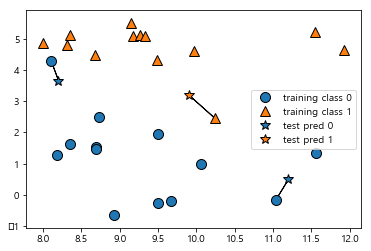

In [12]:
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


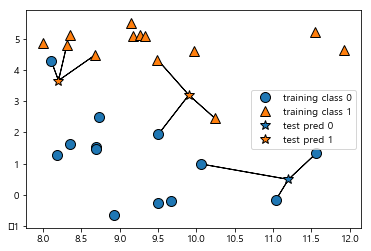

In [13]:
mglearn.plots.plot_knn_classification(n_neighbors=3)
# 가장 많은 클래스를 예측값으로 사용 - 이웃(k)의 값에 따라 결과가 달라질 수 있음.

In [14]:
# 일반화 성능을 평가할 수 있도록 데이터를 훈련 세트와 테스트 세트로 나눔
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [16]:
# 훈련 세트를 이용하여 분류 모델 학습시킴
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=3, p=2,
           weights='uniform')

In [17]:
print("테스트 세트 예측: {}".format(clf.predict(X_test)))

테스트 세트 예측: [1 0 1 0 1 0 0]


In [18]:
print("테스트 세트 정확도: {:.2f}".format(clf.score(X_test, y_test)))

테스트 세트 정확도: 0.86


### KNeighborsClassifier 분석

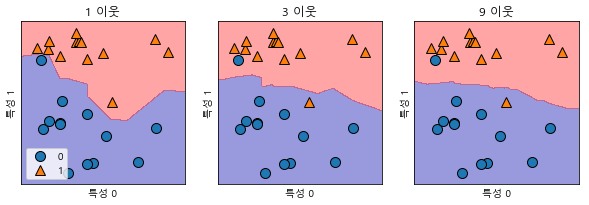

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    # fit 메서도는 self 객체를 반환합니다.
    # 그래서 객체 생성과 fit 메서드를 한 줄에 쓸 수 있습니다.
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:,0],X[:,1], y, ax=ax)
    ax.set_title("{} 이웃".format(n_neighbors))
    ax.set_xlabel("특성 0")
    ax.set_ylabel("특성 1")
axes[0].legend(loc=3)

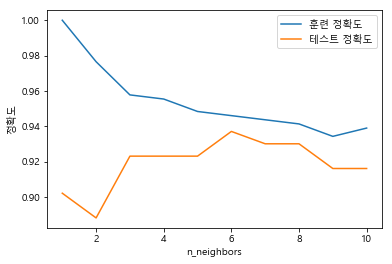

In [20]:
# 유방암 데이터셋 이용해 모델의 복잡도와 일반화 사이의 관계 분석
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# 1에서 10까지 n_neighbors를 적용
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # 모델 생성
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # 훈련 세트 정확도 저장
    training_accuracy.append(clf.score(X_train, y_train))
    # 일반화 정확도 저장
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="훈련 정확도")
plt.plot(neighbors_settings, test_accuracy, label="테스트 정확도")
plt.ylabel("정확도")
plt.xlabel("n_neighbors")
plt.legend()

### k-최근접 이웃 회귀

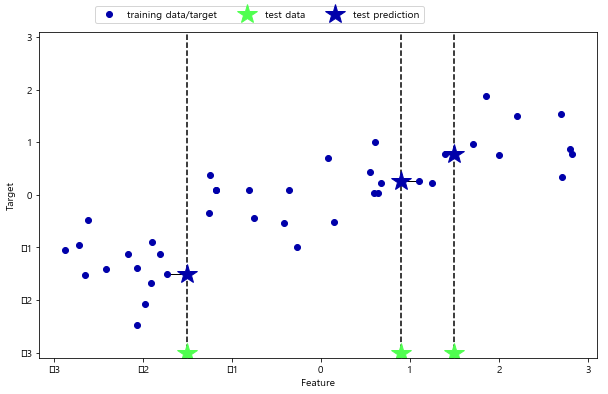

In [21]:
mglearn.plots.plot_knn_regression(n_neighbors=1)

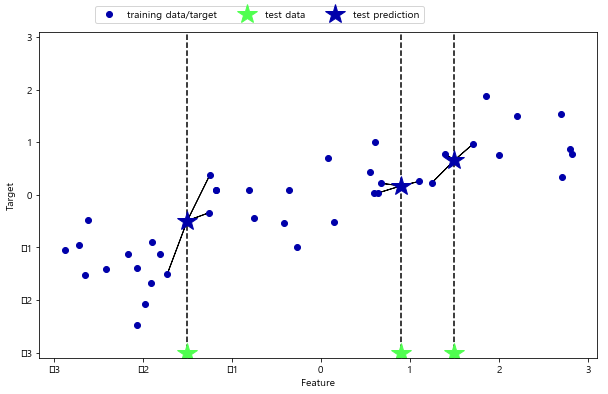

In [22]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [23]:
from sklearn.neighbors import KNeighborsRegressor

X, y = mglearn.datasets.make_wave(n_samples=40)

# wave 데이터셋을 훈련 세트와 테스트 세트로 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 이웃의 수를 3으로 하여 모델의 객체를 만듭니다. 
reg = KNeighborsRegressor(n_neighbors=3)
# 훈련 데이터와 타깃을 사용하여 모델을 학습시킵니다.
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=3, p=2,
          weights='uniform')

In [24]:
print("테스트 세트 예측:\n{}".format(reg.predict(X_test)))

테스트 세트 예측:
[-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [25]:
print("테스트 세트 R^2: {:.2f}".format(reg.score(X_test, y_test)))

테스트 세트 R^2: 0.83


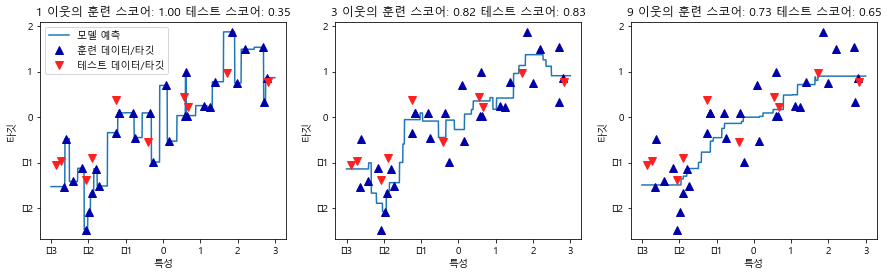

In [26]:
fig, axes = plt.subplots(1,3, figsize=(15,4))
# -3과 3 사이에 1,000개의 데이터 포인트를 만듭니다.
line = np.linspace(-3, 3, 1000).reshape(-1,1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # 1,3,9 이웃을 사용한 예측을 합니다.
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)
    
    ax.set_title(
        "{} 이웃의 훈련 스코어: {:.2f} 테스트 스코어: {:.2f}".format(
        n_neighbors, reg.score(X_train, y_train),
        reg.score(X_test, y_test)))
    ax.set_xlabel("특성")
    ax.set_ylabel("타깃")
axes[0].legend(["모델 예측", "훈련 데이터/타깃", "테스트 데이터/타깃"], loc="best")

- KNeighbors 분류기에 중요한 매개변수는 두개입니다. 데이터 포인트 사이의 거리를 재는 방법과 이웃의 수입니다.
- k-NN은 이해하기 매우 쉬운 모델이나 훈련 세트가 매우 크면 예측이 느려진다 - 데이터 전처리 과정이 중요함.
- 예측이 느리고 많은 특성을 처리하는 능력이 부족해 현업에서는 잘 쓰지 않음.